In [10]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]

In [11]:
from itertools import starmap

species_values = {'A':6, 'B': 2, 'C': 6}
eqs = {'D': lambda x,y: x ** y, 'E': lambda x: x ** 8}
to_solve = {'D': ['A', 'B'], 'E': ['C']}

values_list = [[[species_values[value] for value in list]] for list in list(to_solve.values())]
eqs_list = list(eqs.values())

ultramap = [list(starmap(eqs_list[i], values_list[i])) for i in range(len(list(eqs.keys())))]
print(ultramap)

[[36], [1679616]]


In [12]:
a = [[1, 2],[2, 3]]

[print(i,v) for i,v in a]

1 2
2 3


[None, None]

Text(0.5, 1.0, 'E.coli Size Model')

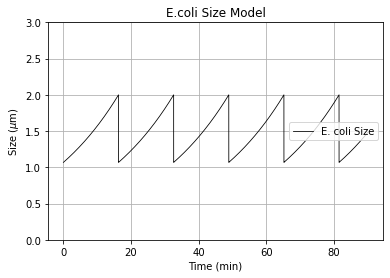

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def bacteria_size(birth_size=1, division_time=18, tmax=10, dt=0.01, division_size=2.0): # sb: micrometros | dt: min
    size_storage = []
    time_storage = []
    time = 0
    counter = 0

    while counter < tmax:

        mu = np.log(2)/division_time
        size = birth_size * np.exp(mu*time)
        reference_tau = 1/mu * np.log(division_size/birth_size)

        size_storage.append(size)
        time_storage.append(counter)

        if size >= division_size:
            time = 0

        elif size < division_size:
            time += dt

        counter += dt
    return time_storage, size_storage

div_s = 2
sb = np.random.normal(loc=div_s/2, scale=0.1*(div_s/2))


time, size = bacteria_size(birth_size=sb,tmax=90) 
plt.plot(time, size, lw=0.8, color='k', label='E. coli Size') 
plt.grid(True)

plt.legend(loc=5)

plt.xlabel('Time (min)')
plt.ylabel(r'Size (${\mu}$m)')
plt.ylim(0, 3)

plt.title('E.coli Size Model')

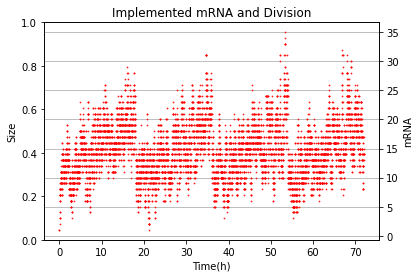

In [92]:

def simulate_division(birth_size=1, division_time=18, tmax=72, dt=0.01, division_size=2.0, mRNA=1, mRNA_c=100, mRNA_d=10):
    
    size_storage = []
    mRNA_array = []
    time_storage = []

    time = 0
    current_time = 0
    reference_time = 0

    while current_time < tmax:

        mu = np.log(2)/division_time
        size = birth_size * np.exp(mu * time)
        reference_division_time = (1/mu) * np.log(division_size/birth_size)
        
        mRNA_synth = (1/mu) * np.log(1 - (mu * np.log(np.random.rand())/(mRNA_c * birth_size*np.exp(mu*time))))
        mRNA_deg = -(1/(mRNA_d * mRNA)) * np.log(np.random.rand())

        tau = np.min([mRNA_synth,mRNA_deg])
        q = np.argmin([mRNA_synth,mRNA_deg])

        if current_time + tau < reference_time:

            if q == 0:
                mRNA += 1

            elif q == 1:
                mRNA -= 1

            current_time += tau
            
        else:
            current_time = reference_time  

            if size >= division_size:
                time = 0

                time_storage.append(current_time)
                size_storage.append(size)
                mRNA_array.append(np.random.binomial(mRNA, 0.5))

                mRNA = np.random.binomial(mRNA, 0.5)
                reference_time += dt

            elif size < division_size:

                time_storage.append(current_time)
                size_storage.append(size)
                mRNA_array.append(mRNA)

                reference_time += dt 
                time += dt

    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    # ax1.plot(time_storage,size_storage, '--',color='grey', linewidth=1.5)
    ax2.plot(time_storage,mRNA_array,'ro', alpha=0.8, linewidth=0.5, ms=0.8)

    ax1.set_xlabel('Time(h)')
    ax1.set_ylabel('Size')
    ax2.set_ylabel('mRNA')
    plt.title('Implemented mRNA and Division')
    ax2.grid()


simulate_division()

In [44]:
def simulate_mRNA(mRNA=1, mRNA_c=100, mRNA_d=10, sampling_time=0.01, tmax=10):

    time_array = []
    mRNA_array = []

    current_time = 0
    reference_time = 0

    while current_time < tmax:

        mRNA_synth = -(1/mRNA_c) * np.log(np.random.rand())
        mRNA_deg = -(1/(mRNA_d * mRNA)) * np.log(np.random.rand())

        tau = np.min([mRNA_synth,mRNA_deg])
        q = np.argmin([mRNA_synth,mRNA_deg])

            
        if current_time + tau < reference_time:

            if q == 0:
                mRNA += 1

            elif q == 1:
                mRNA -= 1

            current_time += tau
        else:
            current_time = reference_time  

            time_array.append(current_time)
            mRNA_array.append(mRNA)

            reference_time += sampling_time 


    plt.plot(mRNA_array, 'ro', ms=0.5)